In [13]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

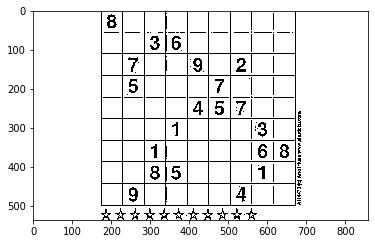

In [28]:
img = cv.imread('sudoku2.jpg')
gray = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
blur = cv.GaussianBlur(gray,(3,3),0)
thres = cv.adaptiveThreshold(blur,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,2)
plt.imshow(thres,'gray')

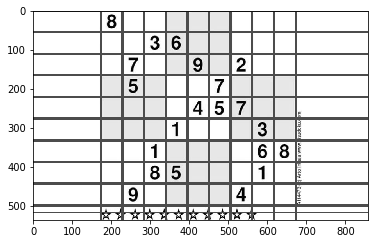

In [30]:
edges = cv.Canny(blur,50,150,apertureSize = 3)
lines = cv.HoughLines(edges,1,np.pi/180,200)
for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))
    cv.line(img,(x1,y1),(x2,y2),(0,0,255),2)
img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
plt.imshow(img,'gray')
plt.show()

In [31]:
#imgray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
#thresh = cv.adaptiveThreshold(imgray,255,cv.ADAPTIVE_THRESH_GAUSSIAN_C,cv.THRESH_BINARY,11,2)
contours, hierarchy = cv.findContours(img, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

458495.0
0
2.0
458495.0
2.0
458495.0
2.0
458495.0
2.0
458495.0
2.0
458495.0
2.0
458495.0
2.0
458495.0
2.0
458495.0
2.0
458495.0
2.0
458495.0
2.0
458495.0
2.0
458495.0
2.0
458495.0
2.0
458495.0
2.0
458495.0
4.0
458495.0
2.0
458495.0
2.0
458495.0
2.0
458495.0
2.0
458495.0
2.0
458495.0
2.0
458495.0
2.0
458495.0
2.0
458495.0
4.0
458495.0
2.0
458495.0
5.5
458495.0
5.5
458495.0
2.0
458495.0
2.0
458495.0
5.5
458495.0
2.0
458495.0
2.0
458495.0
6.0
458495.0
2.0
458495.0
2.0
458495.0
2.0
458495.0
7.5
458495.0
2.0
458495.0
5.5
458495.0
4.0
458495.0
2.0
458495.0
2.0
458495.0
2.0
458495.0
2.0
458495.0
2.0
458495.0
2.0
458495.0
7.0
458495.0
7.5
458495.0
5.5
458495.0
2.0
458495.0
2.0
458495.0
2.0
458495.0
2.0
458495.0
2.0
458495.0
2.0
458495.0
2.0
458495.0
2.0
458495.0
2.0
458495.0
4.0
458495.0
2.0
458495.0
2.0
458495.0
2.0
458495.0
2.0
458495.0
2.0
458495.0
4.0
458495.0
4.0
458495.0
2.0
458495.0
2.0
458495.0
4.0
458495.0
5.5
458495.0
2.0
458495.0
5.5
458495.0
2.0
458495.0
4.0
458495.0
2.0
458495.0
2

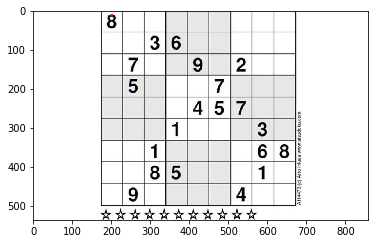

In [33]:
max = 0
cnt = []
for i in range(len(contours)):
    epsilon = 0.01*cv.arcLength(contours[i],True)
    approx = cv.approxPolyDP(contours[i],epsilon,True)
    area = cv.contourArea(approx)
    print(area)
    print(max)
    if area > max :
        max = area
        c = i
        cnt = approx
        #print(cnt)
        #print(c)
#print(cnt)
#epsilon = 0.1*cv.arcLength(cnt,True)
#approx = cv.approxPolyDP(cnt,epsilon,True)
im = cv.imread('sudoku2.jpg')
#epsilon = 0.1*cv.arcLength(cnt,True)
#approx = cv.approxPolyDP(cnt,epsilon,True)
img1 = cv.drawContours(im, [approx], 0, (255,0,0), 3)

plt.imshow(img1)

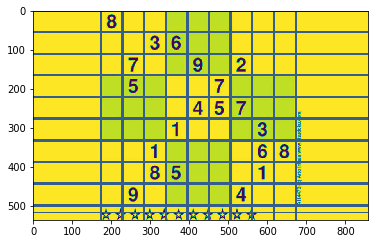

In [22]:
plt.imshow(img)